<a href="https://colab.research.google.com/github/avyxh/Automated-Stroke-Detection/blob/main/Research_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research on Stroke Detection
## Avyukth Harish
### Implemented a novel method of balancing the dataset using class weights in addition to finding the most important feature that should be taken into consideration when determining the probability of a patient getting a stroke.

In [46]:
#@title Loading in our data and importing necessary packages
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import os
path = os.path.join(
    ".",
    "drive",
    "MyDrive",
    "Colab Notebooks",
)
os.listdir(path)

['healthcare-dataset-stroke-data.csv',
 'Avy_PreCamp_Python_Turtle_Student.ipynb',
 'Avy_Optional_PythonLibraries.ipynb',
 'Copy of Student_PythonBasics.ipynb',
 'Copy of Linear_Regression_Student.ipynb',
 'Copy of Logistic_Regression_Solution_A.ipynb',
 'Copy of Logistic_Regression_Student_A.ipynb',
 'Copy of Student_Yelp_Review_Sentiment_Classification.ipynb',
 'Copy of Student_PneumoniaDetection_Section1.ipynb',
 'Copy of Student_CNN.ipynb',
 'Copy of Student_PneumoniaDetection_Section3.ipynb',
 'Copy of Student_PneumoniaDetection_Section2.ipynb',
 'Copy of Student_Streamlit.ipynb',
 'Copy of Solutions_Streamlit.ipynb',
 'Copy of Student_NN_ConscientiousCars_A.ipynb',
 'Copy of Student_Numerical_Data_Preprocessing.ipynb',
 'Synthetic-Data.py',
 'Untitled',
 'Copy of Reinforcement Learning Physics.ipynb',
 'Physics.ipynb',
 'Yelp API.ipynb',
 'LSTMs.ipynb']

In [49]:
# Let's load in our dataset as a pandas dataframe
filepath = os.path.join(
    path,
    "healthcare-dataset-stroke-data.csv",
)

df = pd.read_csv(filepath)

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory data exploration (EDA)

In [50]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [52]:
for col in [
  'gender',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'smoking_status',
  'stroke',
]:
  print('\n-----')
  print(col)
  print(df[col].value_counts())


-----
gender
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

-----
hypertension
hypertension
0    4612
1     498
Name: count, dtype: int64

-----
heart_disease
heart_disease
0    4834
1     276
Name: count, dtype: int64

-----
ever_married
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

-----
work_type
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

-----
Residence_type
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

-----
smoking_status
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

-----
stroke
stroke
0    4861
1     249
Name: count, dtype: int64


In [53]:
df[df['age'] == 1].sort_values('age')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
844,47876,Male,1.0,0,0,No,children,Rural,89.30,21.4,Unknown,0
951,57372,Male,1.0,0,0,No,children,Rural,123.21,15.1,Unknown,0
1432,12687,Male,1.0,0,0,No,children,Urban,101.31,18.3,Unknown,0
1794,46035,Male,1.0,0,0,No,children,Urban,84.85,20.3,Unknown,0
2240,54985,Female,1.0,0,0,No,children,Urban,199.83,24.5,Unknown,0


In [54]:
tmp = df[df['work_type'] == 'children']

display(tmp.describe())
display(tmp.sort_values('age'))

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,687.000000,687.000000,687.0,687.000000,687.000000,671.000000,687.000000
mean,35769.432314,6.841339,0.0,0.001456,94.400277,20.038003,0.002911
std,21005.291797,4.533364,0.0,0.038152,26.658955,4.540639,0.053916
min,77.000000,0.080000,0.0,0.000000,55.340000,10.300000,0.000000
25%,16583.000000,2.000000,0.0,0.000000,76.255000,17.150000,0.000000
50%,35106.000000,6.000000,0.0,0.000000,90.220000,18.900000,0.000000
75%,53933.500000,11.000000,0.0,0.000000,108.710000,21.600000,0.000000
max,72940.000000,16.000000,0.0,1.000000,219.810000,41.700000,1.000000


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
4021,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
3618,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3968,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
292,44338,Female,16.00,0,0,No,children,Rural,110.63,19.5,Unknown,0
4018,29453,Male,16.00,0,0,No,children,Rural,91.58,15.8,Unknown,0
2530,45469,Male,16.00,0,0,No,children,Rural,134.23,30.6,Unknown,0
4878,30658,Male,16.00,0,0,No,children,Rural,82.44,32.6,Unknown,0


In [55]:
tmp = df[df['work_type'] != 'children']

display(tmp.describe())
display(tmp.sort_values('age'))

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4238.000000,4423.000000
mean,36634.073706,48.878137,0.112593,0.062175,107.972336,30.295281,0.055844
std,21185.903051,18.707171,0.316131,0.241500,47.266881,7.335574,0.229647
min,67.000000,7.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,18003.000000,34.000000,0.000000,0.000000,77.445000,25.200000,0.000000
50%,37132.000000,49.000000,0.000000,0.000000,92.150000,29.100000,0.000000
75%,54811.000000,63.000000,0.000000,0.000000,115.885000,34.000000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
410,54975,Male,7.0,0,0,No,Self-employed,Rural,64.06,18.9,Unknown,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
1789,13862,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
455,7351,Male,13.0,0,0,No,Private,Urban,92.14,23.2,never smoked,0
1809,18179,Male,13.0,0,0,No,Private,Rural,99.44,21.0,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,38829,Female,82.0,0,0,Yes,Private,Rural,59.32,33.2,never smoked,1
2275,4591,Female,82.0,0,0,Yes,Self-employed,Rural,117.75,29.8,never smoked,0
5062,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
670,53010,Male,82.0,0,0,Yes,Self-employed,Rural,56.75,21.0,never smoked,0


# Data preprocessing

In [56]:
df.columns.tolist()

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [57]:
# for all: will need impute missing value
# specifically for each one, see below

# rescale the values, e.g. standardize
features_num = [
  'age',
  'avg_glucose_level',
  'bmi',
]

# encode as 0, 1, 2, 3, ... number_of_possible_values
features_ord = [
]

# encode as (0, 0, 1) type of vectors for a class with 3 possible values
# work_type_0, work_type_1, work_type_2 -> (1, 0, 0), (0, 1, 0), or (0, 0, 1)
# exception is binary variables (0, 1), (1, 0) can be replaced 0 or 1
# better for binary
features_cat_bin = [
  'gender',
  'hypertension',
  'heart_disease',
  'ever_married',
  'Residence_type',
]

features_cat_nonbin = [
  'work_type',
  'smoking_status',
  # potentially could convert "Unknown" as NA and handle as missing value
  # and consider as ordinal
  # but then issue of missing value imputation
]


label = 'stroke'

# at this stage we know that:
# numerical variable bmi will need missing value imputation
# all other variables don't have missing value

In [58]:
df_prepro = df.drop(columns='id').copy()

In [59]:
# educational project
df_prepro = df_prepro[df_prepro['gender'] != 'Other']
df_prepro['gender'].value_counts() # sanity check

,count
gender,
Female,2994
Male,2115


In [60]:
# weird values for age --> write as unknown / missing
# df_prepro['age'] = df_prepro['age'].apply(lambda x: x if x >= 1.9 else None)
# df_prepro['age'].value_counts(sort=True)

# # CHOICE: round age to nearest integer
# df_prepro['age'] = df_prepro['age'].round().astype(int)
# df_prepro

In [61]:
df_prepro_reg = df_prepro.copy()
df_prepro_tree = df_prepro.copy()

## Encode ordinal features
- None

## Encode categorical variables

In [62]:
df_prepro_reg = pd.get_dummies(
  df_prepro_reg,
  columns=features_cat_bin+features_cat_nonbin,
  dummy_na=False, # we know there is no missing value
  # IMPORTANT: we know there is no missing value hence (0, ..., 0) encodes a collinear meaningful feature
  drop_first=True,
)
df_prepro_reg.T

,0,1,2,3,4,5,6,7,8,9,...,5100,5101,5102,5103,5104,5105,5106,5107,5108,5109
age,67.0,61.0,80.0,49.0,79.0,81.0,74.0,69.0,59.0,78.0,...,82.0,45.0,57.0,18.0,13.0,80.0,81.0,35.0,51.0,44.0
avg_glucose_level,228.69,202.21,105.92,171.23,174.12,186.21,70.09,94.39,76.15,58.57,...,71.97,97.95,77.93,82.85,103.08,83.75,125.2,82.99,166.29,85.28
bmi,36.6,NaN,32.5,34.4,24.0,29.0,27.4,22.8,NaN,24.2,...,28.3,24.5,21.7,46.9,18.6,NaN,40.0,30.6,25.6,26.2
stroke,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
gender_Male,True,False,True,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
hypertension_1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
heart_disease_1,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ever_married_Yes,True,True,True,True,True,True,True,False,True,True,...,True,True,True,False,False,True,True,True,True,True
Residence_type_Urban,True,False,False,True,False,True,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
work_type_Never_worked,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
df_prepro_tree = pd.get_dummies(
  df_prepro_tree,
  columns=features_cat_bin,
  # IMPORTANT: we know there is no missing value
  dummy_na=False,
  # IMPORTANT: avoid encoding a value as result of too many decisions (deep in the three) for non_binary
  drop_first=True,
)

df_prepro_tree = pd.get_dummies(
  df_prepro_tree,
  columns=features_cat_nonbin,
  # IMPORTANT: we know there is no missing value
  dummy_na=False,
  # IMPORTANT: avoid encoding a value as result of too many decisions (deep in the three) for non_binary
  drop_first=False,
)

df_prepro_tree.T

,0,1,2,3,4,5,6,7,8,9,...,5100,5101,5102,5103,5104,5105,5106,5107,5108,5109
age,67.0,61.0,80.0,49.0,79.0,81.0,74.0,69.0,59.0,78.0,...,82.0,45.0,57.0,18.0,13.0,80.0,81.0,35.0,51.0,44.0
avg_glucose_level,228.69,202.21,105.92,171.23,174.12,186.21,70.09,94.39,76.15,58.57,...,71.97,97.95,77.93,82.85,103.08,83.75,125.2,82.99,166.29,85.28
bmi,36.6,NaN,32.5,34.4,24.0,29.0,27.4,22.8,NaN,24.2,...,28.3,24.5,21.7,46.9,18.6,NaN,40.0,30.6,25.6,26.2
stroke,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
gender_Male,True,False,True,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
hypertension_1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
heart_disease_1,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ever_married_Yes,True,True,True,True,True,True,True,False,True,True,...,True,True,True,False,False,True,True,True,True,True
Residence_type_Urban,True,False,False,True,False,True,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
work_type_Govt_job,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Prepro numerical variables
- Only required for regression models

In [64]:
features_num

['age', 'avg_glucose_level', 'bmi']

In [65]:
from sklearn.preprocessing import StandardScaler

# new name
features_num_enc = [
    # f'{col}_enc' for col in features_num
    f'{col}' for col in features_num
]

enc = StandardScaler()

X = df_prepro_reg[features_num].values
enc.fit(X)

df_prepro_reg[features_num_enc] = enc.fit_transform(X)
df_prepro_reg.T

,0,1,2,3,4,5,6,7,8,9,...,5100,5101,5102,5103,5104,5105,5106,5107,5108,5109
age,1.051242,0.785889,1.626174,0.255182,1.581949,1.6704,1.360821,1.139693,0.697438,1.537723,...,1.714625,0.07828,0.608986,-1.11581,-1.336938,1.626174,1.6704,-0.363976,0.343633,0.034054
avg_glucose_level,2.70645,2.121652,-0.004867,1.437473,1.501297,1.768299,-0.796156,-0.259502,-0.662324,-1.05057,...,-0.754637,-0.180881,-0.623013,-0.514357,-0.067587,-0.494481,0.420922,-0.511266,1.328375,-0.460692
bmi,0.981145,NaN,0.459086,0.701016,-0.623231,0.013426,-0.190304,-0.776029,NaN,-0.597765,...,-0.075706,-0.559566,-0.916094,2.292659,-1.310821,NaN,1.414072,0.217156,-0.419501,-0.343102
stroke,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
gender_Male,True,False,True,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
hypertension_1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
heart_disease_1,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ever_married_Yes,True,True,True,True,True,True,True,False,True,True,...,True,True,True,False,False,True,True,True,True,True
Residence_type_Urban,True,False,False,True,False,True,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
work_type_Never_worked,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
df_prepro_reg.T

,0,1,2,3,4,5,6,7,8,9,...,5100,5101,5102,5103,5104,5105,5106,5107,5108,5109
age,1.051242,0.785889,1.626174,0.255182,1.581949,1.6704,1.360821,1.139693,0.697438,1.537723,...,1.714625,0.07828,0.608986,-1.11581,-1.336938,1.626174,1.6704,-0.363976,0.343633,0.034054
avg_glucose_level,2.70645,2.121652,-0.004867,1.437473,1.501297,1.768299,-0.796156,-0.259502,-0.662324,-1.05057,...,-0.754637,-0.180881,-0.623013,-0.514357,-0.067587,-0.494481,0.420922,-0.511266,1.328375,-0.460692
bmi,0.981145,NaN,0.459086,0.701016,-0.623231,0.013426,-0.190304,-0.776029,NaN,-0.597765,...,-0.075706,-0.559566,-0.916094,2.292659,-1.310821,NaN,1.414072,0.217156,-0.419501,-0.343102
stroke,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
gender_Male,True,False,True,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
hypertension_1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
heart_disease_1,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ever_married_Yes,True,True,True,True,True,True,True,False,True,True,...,True,True,True,False,False,True,True,True,True,True
Residence_type_Urban,True,False,False,True,False,True,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
work_type_Never_worked,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
df_prepro_tree.T

,0,1,2,3,4,5,6,7,8,9,...,5100,5101,5102,5103,5104,5105,5106,5107,5108,5109
age,67.0,61.0,80.0,49.0,79.0,81.0,74.0,69.0,59.0,78.0,...,82.0,45.0,57.0,18.0,13.0,80.0,81.0,35.0,51.0,44.0
avg_glucose_level,228.69,202.21,105.92,171.23,174.12,186.21,70.09,94.39,76.15,58.57,...,71.97,97.95,77.93,82.85,103.08,83.75,125.2,82.99,166.29,85.28
bmi,36.6,NaN,32.5,34.4,24.0,29.0,27.4,22.8,NaN,24.2,...,28.3,24.5,21.7,46.9,18.6,NaN,40.0,30.6,25.6,26.2
stroke,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
gender_Male,True,False,True,False,False,True,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
hypertension_1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
heart_disease_1,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ever_married_Yes,True,True,True,True,True,True,True,False,True,True,...,True,True,True,False,False,True,True,True,True,True
Residence_type_Urban,True,False,False,True,False,True,False,True,False,True,...,False,True,False,True,False,True,True,False,False,True
work_type_Govt_job,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


## Get list of feature names

In [68]:
label = 'stroke'
features_reg = sorted(list(set(df_prepro_reg.columns).difference(set([label]))))
features_tree = sorted(list(set(df_prepro_tree.columns).difference(set([label]))))

print(len(features_reg), features_reg)
print(len(features_tree), features_tree)

15 ['Residence_type_Urban', 'age', 'avg_glucose_level', 'bmi', 'ever_married_Yes', 'gender_Male', 'heart_disease_1', 'hypertension_1', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']
17 ['Residence_type_Urban', 'age', 'avg_glucose_level', 'bmi', 'ever_married_Yes', 'gender_Male', 'heart_disease_1', 'hypertension_1', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']


# Modeling

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn import ensemble

In [70]:
# TMP
df_prepro_reg = df_prepro_reg[df_prepro_reg['bmi'].notna()]
df_prepro_tree = df_prepro_tree[df_prepro_tree['bmi'].notna()]

In [71]:
X_reg = df_prepro_reg[features_reg].values
y_reg = df_prepro_reg[label].values

X_tree = df_prepro_tree[features_tree].values
y_tree = df_prepro_tree[label].values

## Tree-based

In [72]:
np.sum(y_tree), len(y_tree) - np.sum(y_tree)

(209, 4699)

In [73]:
alpha = 4699 / 209
print(alpha)

22.483253588516746


In [74]:
# # fitting Logistic Regression to the training set

# # s_weight = np.ones(shape=(len(y_train),))
# # s_weight[y_train == 1] = 1
# # dt = tree.DecisionTreeClassifier(class_weight='balanced')

# class_weight = None
# class_weight = 'balanced'
# class_weight = {0: 1, 1: 22.5}
# class_weight = {0: 1, 1: 225}

# dt = tree.DecisionTreeClassifier(class_weight=class_weight, max_depth=5)

# dt.fit(X_tree, y_tree)
# # model.fit(X_tree, y_tree, sample_weight=s_weight)

In [75]:
# dt.feature_importances_

In [76]:
alpha_range = [ 2**(i-2) for i in range(12) ]
print(alpha_range)

[0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]


In [77]:
results = []
for alpha in alpha_range:
  # -> w0 = 1
  # -> w1 = alpha * w0
  class_weight = {
    0: 1,
    1: alpha,
  }

  # # -> w0 + w1 = 2
  # # -> w1 = alpha * w0
  # # -> (1 + alpha) * w0 = 2
  # class_weight = {
  #   0: 2 / (1 + alpha),
  #   1: 2 - 2 / (1 + alpha),
  # }

  rf = ensemble.RandomForestClassifier(
    class_weight=class_weight,
    max_depth=5, # to avoid overfitting
  )


  skf = StratifiedKFold(n_splits=10)
  results.append(cross_validate(
    rf,
    X_tree,
    y_tree,
    cv=skf,
    scoring=('accuracy', 'balanced_accuracy', 'precision', 'recall'),
    return_train_score=False,
  ))

#print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

In [78]:
results[0]

{'fit_time': array([1.3302443 , 1.15267372, 1.08123612, 1.25798798, 0.69250965,
        0.75154066, 0.56631207, 0.70694375, 0.93378949, 0.78321767]),
 'score_time': array([0.07483077, 0.06547689, 0.04850864, 0.06416106, 0.02059841,
        0.02286768, 0.02934551, 0.02258062, 0.02171159, 0.06929827]),
 'test_accuracy': array([0.95723014, 0.95723014, 0.95723014, 0.95723014, 0.95723014,
        0.95723014, 0.95723014, 0.95723014, 0.95714286, 0.95918367]),
 'test_balanced_accuracy': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'test_precision': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_recall': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

print(alpha_range)
results = 25

accuracy_lst = [ 100 * np.mean(result['test_accuracy']) for result in results ]
print(accuracy_lst)

balanced_accuracy_lst = [ 100 * np.mean(result['test_balanced_accuracy']) for result in results ]
print(balanced_accuracy_lst)

recall_lst = [ 100 * np.mean(result['test_recall']) for result in results ]
print(recall_lst)

precision_lst = [ 100 * np.mean(result['test_precision']) for result in results ]
print(precision_lst)

In [79]:
print(alpha_range)

accuracy_lst = [ 100 * np.mean(result['test_accuracy']) for result in results ]
print(accuracy_lst)

balanced_accuracy_lst = [ 100 * np.mean(result['test_balanced_accuracy']) for result in results ]
print(balanced_accuracy_lst)

recall_lst = [ 100 * np.mean(result['test_recall']) for result in results ]
print(recall_lst)

precision_lst = [ 100 * np.mean(result['test_precision']) for result in results ]
print(precision_lst)

[0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
[95.74167671141775, 95.74167671141775, 95.74167671141775, 95.74167671141775, 95.63984371752774, 92.74629036950829, 83.19127977056404, 65.30279728999542, 55.74670601438132, 48.00432270667942, 45.41651772725383, 42.15686437507794]
[50.0, 50.0, 50.0, 50.0, 51.08409321175279, 58.25214731812063, 72.46331790893557, 74.3261730859381, 73.45353022123426, 71.24167536179286, 69.65097763462323, 68.40342361142615]
[0.0, 0.0, 0.0, 0.0, 2.380952380952381, 20.547619047619044, 60.738095238095234, 84.19047619047619, 92.8095238095238, 96.64285714285712, 96.14285714285714, 97.0952380952381]
[0.0, 0.0, 0.0, 0.0, 35.0, 18.933879073809663, 14.614931597546207, 9.539497183737732, 8.259321483730918, 7.3638284675727945, 7.0042340797107725, 6.697632476913536]


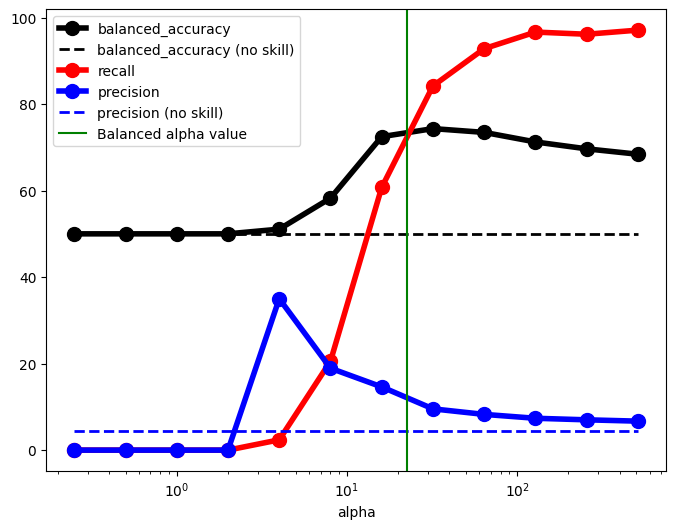

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.plot(alpha_range, balanced_accuracy_lst, '.-k', label='balanced_accuracy', lw=4, ms=20)
plt.plot(alpha_range, [ 50 for _ in alpha_range ], '--k', label='balanced_accuracy (no skill)', lw=2, ms=20)

plt.plot(alpha_range, recall_lst,'.-r',  label='recall', lw=4, ms=20)

plt.plot(alpha_range, precision_lst, '.-b', label='precision', lw=4, ms=20)
plt.plot(alpha_range, [ 100 * np.sum(y_tree) / ( len(y_tree) - np.sum(y_tree) ) for _ in alpha_range ], '--b', label='precision (no skill)', lw=2, ms=20)
plt.axvline(x=22.5, color='g', label='Balanced alpha value')
plt.savefig(
'tmp0.png',
format='png',
bbox_inches='tight',
dpi=300, # KEY NUMBER
)
plt.xscale('log')

plt.xlabel('alpha')

plt.legend()

plt.show()

# Recall is a metric that quantifies the number of correct positive predictions
# made out of all positive predictions that could have been made.

# Unlike precision that only comments on the correct positive predictions out of
# all positive predictions, recall provides an indication of missed positive predictions.

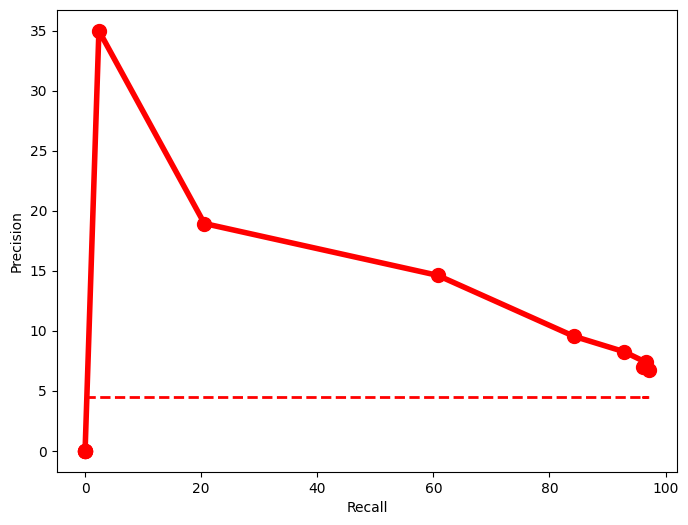

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(recall_lst, precision_lst, '.-r', lw=4, ms=20)
plt.plot(recall_lst, [ 100 * np.sum(y_tree) / ( len(y_tree) - np.sum(y_tree) ) for _ in recall_lst ], '--r', lw=2, ms=20)

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.show()

In [82]:
# #from sklearn import tree
# from sklearn.inspection import permutation_importance

# # fitting Logistic Regression to the training set

# # s_weight = np.ones(shape=(len(y_train),))
# # s_weight[y_train == 1] = 1
# # dt = tree.DecisionTreeClassifier(class_weight='balanced')

# class_weight = None
# class_weight = 'balanced'
# class_weight = {0: 1, 1: 22.5}
# class_weight = {0: 1, 1: 225}

# dt = tree.DecisionTreeClassifier(class_weight=class_weight, max_depth=5)

# dt.fit(X_train, y_train)
# # model.fit(X_train, y_train, sample_weight=s_weight)


# y_train_pred = dt.predict(X_train)
# y_test_pred = dt.predict(X_test)

# print(
#   'accuracy_score:',
#   accuracy_score(y_train, y_train_pred)*100,
#   accuracy_score(y_test, y_test_pred)*100
# )

# print(
#   'balanced_accuracy_score:',
#   balanced_accuracy_score(y_train, y_train_pred)*100,
#   balanced_accuracy_score(y_test, y_test_pred)*100
# )

# print(
#   'precision_score:',
#   precision_score(y_train, y_train_pred)*100,
#   precision_score(y_test, y_test_pred)*100
# )

# print(
#   'recall_score:',
#   recall_score(y_train, y_train_pred)*100,
#   recall_score(y_test, y_test_pred)*100
# )

In [83]:
# line plot of precision vs alpha
# line plot of recall vs alpha
# scatter plot of (precision, recall) with symbols for different alpha

In [84]:
# plt.plot(alpha_range, precision_lst)
# plt.show()

In [85]:
# plt.plot(alpha_range, recall_lst)
# plt.show()

In [86]:
# |result = permutation_importance(dt, X_train, y_train, n_repeats=10, random_state=0)
# print(result.importances_mean)

In [87]:
# dt.feature_importances_

In [88]:
feature_names = [ f"{i}" for i in features_tree ]

forest = ensemble.RandomForestClassifier(
  random_state=0,
  class_weight={0: 1, 1: 22.5},
  max_depth=5, # to avoid overfitting
)

forest.fit(X_tree, y_tree)

RandomForestClassifier(class_weight={0: 1, 1: 22.5}, max_depth=5,
                       random_state=0)

age                               0.463454
avg_glucose_level                 0.119235
ever_married_Yes                  0.090309
bmi                               0.088416
hypertension_1                    0.079831
heart_disease_1                   0.051958
work_type_children                0.026661
smoking_status_Unknown            0.020122
work_type_Self-employed           0.012665
smoking_status_formerly smoked    0.009914
gender_Male                       0.007446
work_type_Govt_job                0.006920
work_type_Private                 0.006892
Residence_type_Urban              0.006550
smoking_status_never smoked       0.006082
smoking_status_smokes             0.003470
work_type_Never_worked            0.000074
dtype: float64


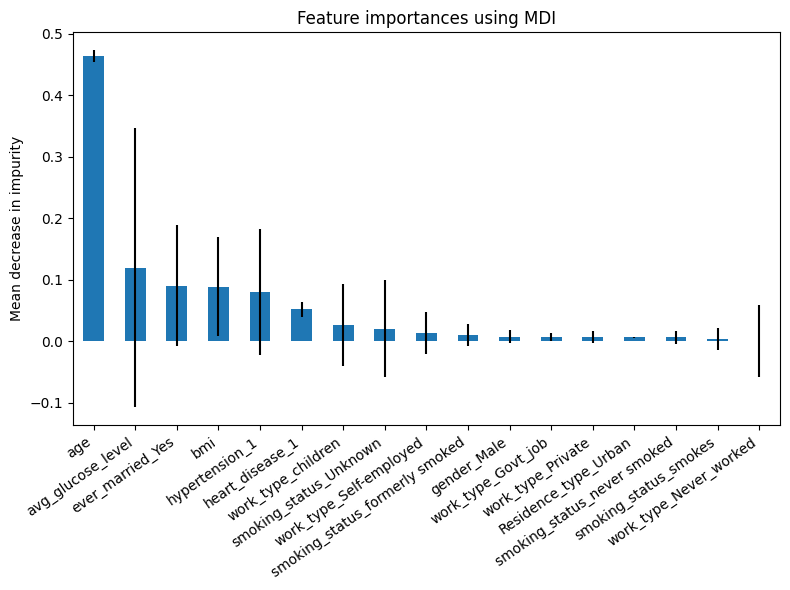

In [89]:
importances = forest.feature_importances_

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(forest_importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

fig, ax = plt.subplots(figsize=(8,6))
forest_importances.plot.bar(yerr=std, ax=ax)

plt.xticks(rotation=35, ha='right') # Rotates X-Axis Ticks by 45-degrees

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()